In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
dataset=pd.read_csv('Classified Data',index_col=0)
dataset.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


In [12]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()
sc.fit(dataset.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
transform_data=sc.transform(dataset.drop('TARGET CLASS',axis=1))

In [22]:
transform_dataset=pd.DataFrame(transform_data,columns=dataset.columns[:-1])
transform_dataset

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transform_dataset,dataset['TARGET CLASS'],test_size=0.30)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(pred,y_test))

[[120  12]
 [ 17 151]]


In [67]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       132
           1       0.93      0.90      0.91       168

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [68]:
#how to choose k values
err_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    err_rate.append(np.mean(pred!=y_test))

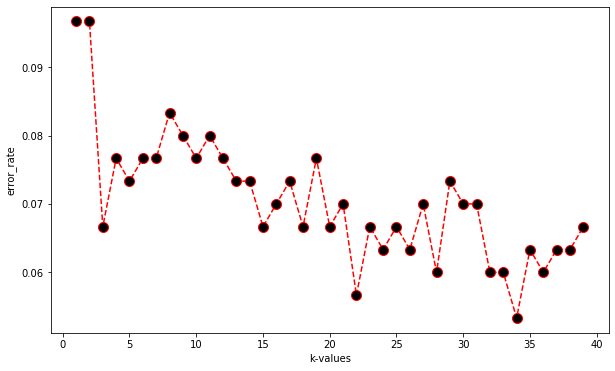

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='black',markersize=10)
plt.xlabel('k-values')
plt.ylabel('error_rate')
plt.show()

in this di